<a href="https://colab.research.google.com/github/endiesworld/2110ACDS_T7_C_Predict/blob/main/2110ACDS_T7_starter_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDSA Movie Recommendation 2022

© Explore Data Science Academy

---
### Honour Code

**2110ACDS_T6**, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.


  

<h2><center> EDSA Movie Recommendation 2022</h2></center>
<figure>
<center><img src ="./assets/movies.png" width = "800" height = '500'/>

*Introduction*
<p align = "justify">Recommender System is a system that seeks to predict or filter preferences according to the user’s choices. Recommender systems are utilized in a variety of areas, and in this project we will use a recommender system to recommend movies for movie lovers.


*About the problem*
<p align = "justify">PUT PROBLEM STATEMENT HERE.

*Objective*
<p align = "justify"> We aim to provide an accurate and robust solution to this problem, by providing personalised recommendations to users of this product, and generating platform affinity for the streaming services which best facilitates their audience's viewing

*Process*
<p align = "justify"> In order to achieve this objective the team will follow the process below:-

1. analyse the supplied data, identify potential errors in the data and clean the existing data set;

2. determine if additional features can be added to enrich the data set;

3. build a model that is capable of predicting how a user will rate a movie;

4. evaluate the accuracy of the best machine learning model;

5. accurately predicting how a user will rate a movie they have not yet viewed, based on their historical preferences, and

6. explain the inner working of the model to a non-technical audience.

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [52]:

# Import comet_ml at the top of your file
# from comet_ml import Experiment

# # Create an experiment with your api key
# experiment = Experiment(
#     api_key="emBEBYBp72gW5tfeZBSGftD0Y",
#     project_name="movie-recommendation",
#     workspace="emmanuelokoro",
#     log_code = True
# )

In [102]:
# Libraries for importing and loading data
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
import scipy as sp # <-- The sister of Numpy, used in our code for numerical efficientcy. 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from textwrap import wrap

# Entity featurization and similarity computation
from sklearn.metrics.pairwise import cosine_similarity 
from sklearn.feature_extraction.text import TfidfVectorizer
from surprise import SVD
from surprise import Reader, Dataset
from surprise.model_selection import GridSearchCV, cross_validate


# Libraries used during sorting procedures.
import operator # <-- Convienient item retrieval during iteration 
import heapq # <-- Efficient sorting of large lists
from time import time

# Setting global constants to ensure notebook results are reproducible

RANDOM_STATE = 42


import warnings
warnings.filterwarnings('ignore')

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

### 2.1 Brief description of the data



In [54]:
# load the data
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
genome_scores = pd.read_csv('./data/genome_scores.csv')
genome_tags = pd.read_csv('./data/tags.csv')
imdb_data = pd.read_csv('./data/imdb_data.csv')
links = pd.read_csv('./data/links.csv')
movies = pd.read_csv('./data/movies.csv')
tags = pd.read_csv('./data/tags.csv')

In [55]:
# Preview train dataset
print('The Shape of the data is: ', train.shape)
train.head()

The Shape of the data is:  (10000038, 4)


,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [56]:
# Preview train dataset
print('The Shape of the data is: ', test.shape)
test.head()

The Shape of the data is:  (5000019, 2)


,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


In [57]:
# Preview genome_scores dataset
print('The Shape of the data is: ', genome_scores.shape)
genome_scores.head()

The Shape of the data is:  (15584448, 3)


,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [58]:
# Preview genome_scores dataset
print('The Shape of the data is: ', genome_tags.shape)
genome_tags.head()

The Shape of the data is:  (1093360, 4)


,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [59]:
# Preview imdb_data dataset
print('The Shape of the data is: ', imdb_data.shape)
imdb_data.head()

The Shape of the data is:  (27278, 6)


,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [60]:
# Preview links dataset
print('The Shape of the data is: ', links.shape)
links.head()

The Shape of the data is:  (62423, 3)


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [61]:
# Preview movies dataset
print('The Shape of the data is: ', movies.shape)
movies.head()

The Shape of the data is:  (62423, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [62]:
# Preview tags dataset
print('The Shape of the data is: ', tags.shape)
tags.head()

The Shape of the data is:  (1093360, 4)


,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


#### Dataset summary


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |

---


### 3.1 Exploratory Data Analysis
*What is Exploratory data analysis?*
    Exploratory data analysis (EDA) is the process of analysing and investigating data sets and summarizing their main characteristics, often employing both non-graphical and graphical methods. 

*Why is conducting EDA important?*
    It aids in determining how best to manipulate data to get the required answers, expose trends, patterns, and relationships that are not readily apparent i.e. get insights into the dataset.

*How is EDA conducted?*
    EDA can be conducted in the following ways:
- **Univariate**:- \
    i. **non-graphical**:- This is simplest form of data analysis, where the data being analyzed consists of just one variable. Since it’s a single variable, it doesn’t deal with causes or relationships.\
    ii. **graphical**:- Non-graphical methods don’t provide a full picture of the data. Graphical methods are therefore required. It involves visual exploratory analysis of the data.
- Multivariate:-  \
    i. **non-graphical**:- Multivariate non-graphical EDA techniques generally show the relationship between two or more variables of the data through cross-tabulation or statistics. \
    ii. **graphical**:- Multivariate data uses graphics to display relationships between two or more sets of data. The most used graphic is a grouped bar plot or bar chart with each group representing one level of one of the variables and each bar within a group representing the levels of the other variable.
    


#### 3.1.1 Movies produced per Year
In this section, we are interested in knowing the years with the highest numbers of movies produced. This information will enable us visually explore how the movie industry has performed over the years.

In [63]:
# Make a copy of movie table
movies_table = movies.copy()

# Remove delimiters from interested columns
movies_table["genres"] = movies_table["genres"].str.replace('|', ' ', regex=True)
movies_table["title"] = movies_table["title"].str.replace('(', ' ', regex=True)
movies_table["title"] = movies_table["title"].str.replace(')', ' ', regex=True)
movies_table["genres"] = movies_table["genres"].str.replace('(', ' ', regex=True)
movies_table["genres"] = movies_table["genres"].str.replace(')', ' ', regex=True)
# Create a movie year column
movies_table["year"] = movies_table["title"].str.replace(r'[a-zA-Z]', '', regex=True)
movies_table["year"] = movies_table["year"].str.replace(r' ', '', regex=True)
movies_table.head()

,movieId,title,genres,year
0,1,Toy Story 1995,Adventure Animation Children Comedy Fantasy,1995
1,2,Jumanji 1995,Adventure Children Fantasy,1995
2,3,Grumpier Old Men 1995,Comedy Romance,1995
3,4,Waiting to Exhale 1995,Comedy Drama Romance,1995
4,5,Father of the Bride Part II 1995,Comedy,1995


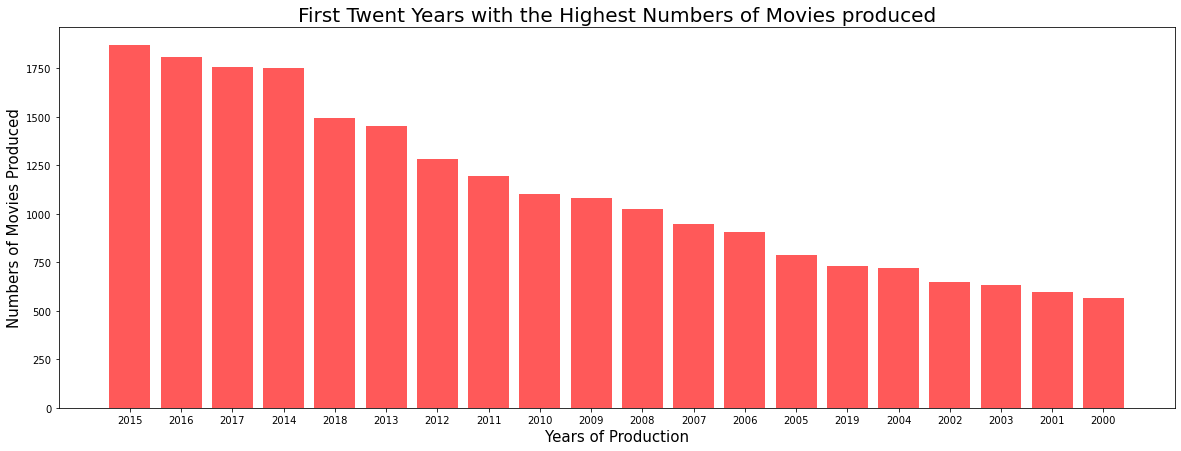

In [64]:
# Visualise the first twenty years with the highest numbers of movies produced
movies_table["year"] = movies_table["year"].astype('str')
movies_year_count = movies_table["year"].value_counts()
fig, ax = plt.subplots( figsize=(20,7))
# p = sns.barplot(x=movies_year_count.index[:20], y=movies_year_count.values[:20])
ax.bar(movies_year_count.index[:20], movies_year_count.values[:20],  facecolor='r', alpha=0.65)
ax.set_xlabel("Years of Production", fontsize = 15)
ax.set_ylabel("Numbers of Movies Produced", fontsize = 15)
ax.set_title("First Twent Years with the Highest Numbers of Movies produced", fontsize = 20)
plt.show()

#### 3.1.2 Movies Genres

For this stage, we are interested in knowing the genres that appears most in movies. This information will enable us understand the genres of movies produced most for the period the data was captured.

In [65]:
def tokenizer(data, col):
    """
        This function takes in a dataframe and a col, creates a new column to store the tokenized words
        in the inputed column, and returns a new dataframe.
    """
    df = data.copy()
    tokeniser = TreebankWordTokenizer()
    df['genre_tok'] = df[col].apply(tokeniser.tokenize)
    return df  

In [66]:
# Tokenized genre column
movies_table = tokenizer(movies_table, 'genres')
movies_table.head()

,movieId,title,genres,year,genre_tok
0,1,Toy Story 1995,Adventure Animation Children Comedy Fantasy,1995,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji 1995,Adventure Children Fantasy,1995,"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men 1995,Comedy Romance,1995,"[Comedy, Romance]"
3,4,Waiting to Exhale 1995,Comedy Drama Romance,1995,"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II 1995,Comedy,1995,[Comedy]


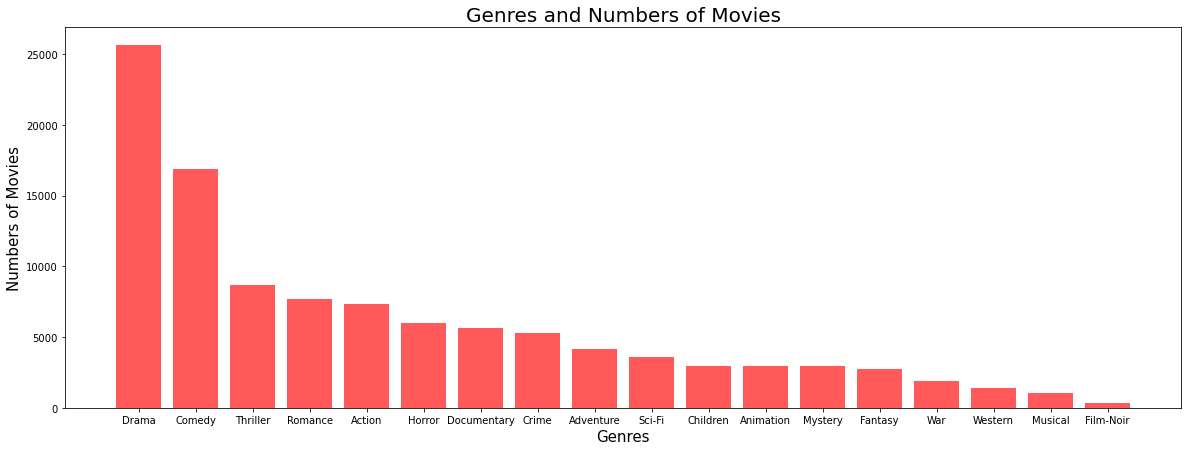

In [67]:
# Collect the tokenized genre in a list form
genres = movies_table['genre_tok'].values.tolist()
all_genres = []

# Merge the genre values
for index, genre in enumerate(genres):
    all_genres.extend(genre)

genre_df = pd.DataFrame({
    "genre":all_genres
})

genre_df = genre_df[genre_df['genre'].isin(['no', 'listed', 'genres', 'IMAX']) == False]

# Visualise the first twenty years with the highest numbers of movies produced
genre_count = genre_df["genre"].value_counts()
fig, ax = plt.subplots( figsize=(20,7))
ax.bar(genre_count.index, genre_count.values,  facecolor='r', alpha=0.65)
ax.set_xlabel("Genres", fontsize = 15)
ax.set_ylabel("Numbers of Movies", fontsize = 15)
ax.set_title("Genres and Numbers of Movies", fontsize = 20)
plt.show()

#### 3.1.3 Top Rated Movies

For this section, we want to know the movies that have has a rating of 4 and above. We have considered less than 4 to be average rating.

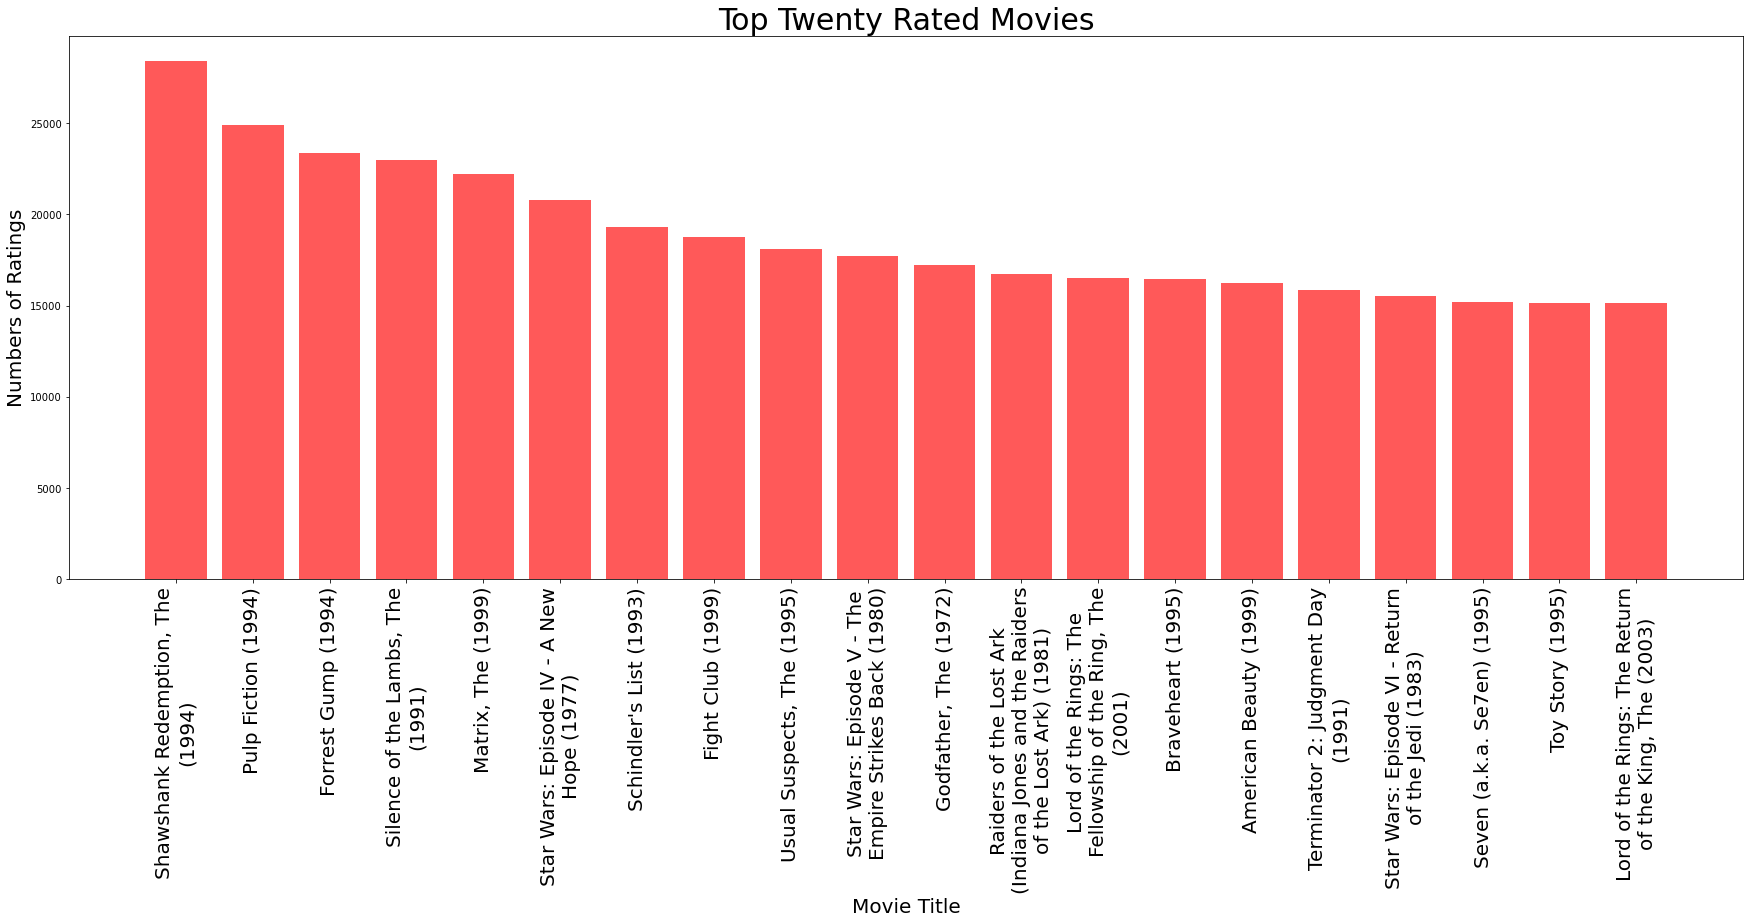

In [68]:
train_table = train.copy()
train_table.drop(columns='timestamp', inplace=True)
ratings = train_table[['movieId','rating']]
ratings = ratings[ratings['rating'] > 3.9]
ratings = ratings.merge(movies, on = 'movieId', how= 'left')

# def wrapper(x):
#     text = [ '\n'.join(wrap(l, 20)) for l in x]
#     return text

# ratings['title'] = ratings['title'].apply(wrapper)
movies_ratings = ratings['title'].value_counts()

labels = [ '\n'.join(wrap(l, 30)) for l in movies_ratings.index[:20]]



fig, ax = plt.subplots( figsize=(30,10))

ax.bar(labels, movies_ratings.values[:20],  color='r', alpha=0.65, width = 0.8)
ax.set_xlabel("Movie Title", fontsize = 20)
ax.set_ylabel("Numbers of Ratings", fontsize = 20)
ax.set_title("Top Twenty Rated Movies", fontsize = 30)
plt.xticks(rotation=90, fontsize= 20)
plt.show()

#### 3.1.4 Top Movie Viewers
For this stage, we want to know the userIds that views the most of movies. This information Is useful in identifying top customers and their movie preference.

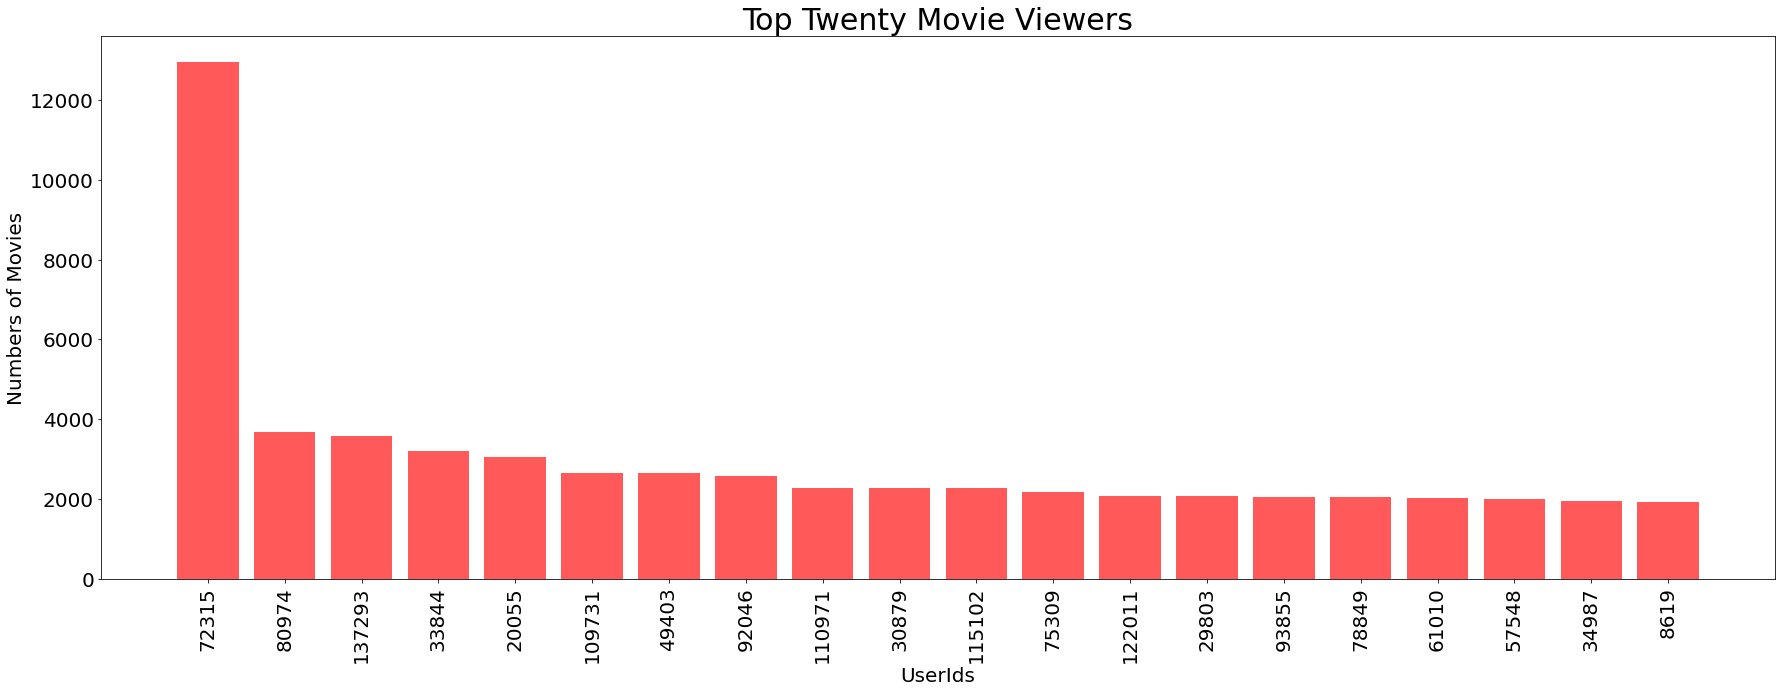

In [69]:
# Top movie viewers
train_table['userId'] = train_table['userId'].astype('str')
viewers = train_table['userId'].value_counts()
fig, ax = plt.subplots( figsize=(30,10))

ax.bar(viewers.index[:20], viewers.values[:20],  color='r', alpha=0.65, width = 0.8)
ax.set_xlabel("UserIds", fontsize = 20)
ax.set_ylabel("Numbers of Movies", fontsize = 20)
ax.set_title("Top Twenty Movie Viewers", fontsize = 30)
plt.xticks(rotation=90, fontsize= 20)
plt.yticks( fontsize= 20)
plt.show()

### 3.2 Summarry of EDA

**Movies per Year**
Over 1700 movies were produced in the year 2015, which is the year with the highest numbers of movies produced, followed by the year 2016 and 2017, which both have over 1500 movies produced.

**Movie Genres**

The top three movie genres are:
- Drama
- Comedy
- Thriller

**Top three Most Viewed Movies**
- Shawshank Redemption (1994)
- Pulp Fiction (1994)
- Forrest Gump (1994)

**Top Movie Viewers**
- 72315
- 80974
- 137293




<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |


---

**Data(Feature) Engineering** is the process of using domain knowledge to reconfigure the data and create “features” that optimize machine learning algorithms. With the insight gained from the **EDA** section above, we have decided to work with the below listed table:
- train
- test
- movies
- imdb_data

Also, for this phase we shall execute the below task on our dataset:
- Identify the unique userIds in the test data and only work with same for the purpose of **Content-based** algorithm
- Sort both the train and test dataset by userId for both algorithms
- Merge the movie and imdb_data tables separately with both the test and train dataset, for both algorithms 
- Drop unwanted columns after the merge
- Generate a key word column, which is a collection of all vital features of a movie for **conten-based** algorithm
- Divide the dataset set into chunks of 162,350( unique userId per chunk), to ease data processing acivities like vectorization and evaluation of cosine_similarity

#### Test userId
We want to evaluate the difference between the unique userId in the Train dataset and Test dataset. This will aid our decision on how to finally prepare our datasets for modelings.

In [70]:
test['userId'].nunique()

162350

In [71]:
test_case = test['userId'].nunique()
train_case = train['userId'].nunique()
print('The difference in unique userID count between train and test data set is:', (train_case - test_case))

The difference in unique userID count between train and test data set is: 191


From the above, proceed to extract these 191 userIds, that are not required for prediction

In [72]:
test_userids = test['userId'].unique().tolist()
test_userids[:20]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

#### UserId selection

The below cell selects the userIds from train dataset, which will be used for the below prediction methods:
- content-base method
- collaborative-filtering method

In [73]:
#Extract rows with userId present in test userId

# Uncomment the immediate line of code below, when generating chunks for content-base recommendations 
# useful_train = train[train['userId'].isin(test_userids)]

# Uncomment the immediate line of code below, when making predicitons with collaborative-filtering method
useful_train = train.copy()

useful_train.shape

(10000038, 4)

#### Sorting of Tables

We proceed to sort both tables( train and test ) by useId

In [74]:
# Sort train dataset by userId
useful_train.sort_values(by=['userId'], inplace= True)
useful_train.head()

,userId,movieId,rating,timestamp
6308822,1,296,5.0,1147880044
3137042,1,27721,3.0,1147869115
2533005,1,665,5.0,1147878820
2524478,1,4308,3.0,1147868534
1946297,1,1250,4.0,1147868414


In [75]:
# Sort test dataset by userId
test.sort_values(by=['userId'], inplace= True)
test.head()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


#### Merging of relevant tables

At this stage, we merge both tables with other tables considered to be useful for the task at hand.
The tables we merge with are listed below:
- imdb_data
- movies


In [76]:
# Merge train table with imdb_data table 
useful_train = useful_train.merge(imdb_data, on = 'movieId', how= 'left')
useful_train.head()

,userId,movieId,rating,timestamp,title_cast,director,runtime,budget,plot_keywords
0,1,296,5.0,1147880044,Tim Roth|Amanda Plummer|Laura Lovelace|John Tr...,Quentin Tarantino,154.0,"$8,000,000",nonlinear timeline|overdose|drug overdose|bondage
1,1,27721,3.0,1147869115,Audrey Tautou|Gaspard Ulliel|Dominique Pinon|C...,Sébastien Japrisot,133.0,"$56,600,000",cracking a nut|bedridden|boot|mouse
2,1,665,5.0,1147878820,Predrag 'Miki' Manojlovic|Lazar Ristovski|Mirj...,Dusan Kovacevic,170.0,"$14,000,000",magical realism|communism|zoo|black comedy
3,1,4308,3.0,1147868534,Nicole Kidman|Ewan McGregor|John Leguizamo|Jim...,Baz Luhrmann,127.0,"$50,000,000",belle epoque|tragic ending|jealousy|jukebox mu...
4,1,1250,4.0,1147868414,NaN,NaN,NaN,NaN,NaN


In [77]:
# Merge test table with imdb_data table 
test = test.merge(imdb_data, on = 'movieId', how= 'left')
test.head()

,userId,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,2011,NaN,NaN,NaN,NaN,NaN
1,1,4144,Maggie Cheung|Tony Chiu-Wai Leung|Ping Lam Siu...,Kar-Wai Wong,98.0,NaN,adultery|loneliness|neighbor|infidelity
2,1,5767,NaN,NaN,NaN,NaN,NaN
3,1,6711,Scarlett Johansson|Bill Murray|Akiko Takeshita...,Sofia Coppola,102.0,"$4,000,000",older man younger woman relationship|lonelines...
4,1,7318,Jim Caviezel|Maia Morgenstern|Christo Jivkov|F...,Benedict Fitzgerald,127.0,"$30,000,000",suffering|torture|brutality|whipping


In [78]:
# Merge train table with movies table 
useful_train = useful_train.merge(movies, on = 'movieId', how= 'left')
useful_train.head()

,userId,movieId,rating,timestamp,title_cast,director,runtime,budget,plot_keywords,title,genres
0,1,296,5.0,1147880044,Tim Roth|Amanda Plummer|Laura Lovelace|John Tr...,Quentin Tarantino,154.0,"$8,000,000",nonlinear timeline|overdose|drug overdose|bondage,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1,1,27721,3.0,1147869115,Audrey Tautou|Gaspard Ulliel|Dominique Pinon|C...,Sébastien Japrisot,133.0,"$56,600,000",cracking a nut|bedridden|boot|mouse,"Very Long Engagement, A (Un long dimanche de f...",Drama|Mystery|Romance|War
2,1,665,5.0,1147878820,Predrag 'Miki' Manojlovic|Lazar Ristovski|Mirj...,Dusan Kovacevic,170.0,"$14,000,000",magical realism|communism|zoo|black comedy,Underground (1995),Comedy|Drama|War
3,1,4308,3.0,1147868534,Nicole Kidman|Ewan McGregor|John Leguizamo|Jim...,Baz Luhrmann,127.0,"$50,000,000",belle epoque|tragic ending|jealousy|jukebox mu...,Moulin Rouge (2001),Drama|Musical|Romance
4,1,1250,4.0,1147868414,NaN,NaN,NaN,NaN,NaN,"Bridge on the River Kwai, The (1957)",Adventure|Drama|War


In [79]:
# Merge test table with movies table 
test = test.merge(movies, on = 'movieId', how= 'left')
test.head()

,userId,movieId,title_cast,director,runtime,budget,plot_keywords,title,genres
0,1,2011,NaN,NaN,NaN,NaN,NaN,Back to the Future Part II (1989),Adventure|Comedy|Sci-Fi
1,1,4144,Maggie Cheung|Tony Chiu-Wai Leung|Ping Lam Siu...,Kar-Wai Wong,98.0,NaN,adultery|loneliness|neighbor|infidelity,In the Mood For Love (Fa yeung nin wa) (2000),Drama|Romance
2,1,5767,NaN,NaN,NaN,NaN,NaN,Teddy Bear (Mis) (1981),Comedy|Crime
3,1,6711,Scarlett Johansson|Bill Murray|Akiko Takeshita...,Sofia Coppola,102.0,"$4,000,000",older man younger woman relationship|lonelines...,Lost in Translation (2003),Comedy|Drama|Romance
4,1,7318,Jim Caviezel|Maia Morgenstern|Christo Jivkov|F...,Benedict Fitzgerald,127.0,"$30,000,000",suffering|torture|brutality|whipping,"Passion of the Christ, The (2004)",Drama


#### Merging vital colunms

For this stage, we proceed to merge columns we have considered to be important in describing the content of a movie into a new column called key_words. The columns are listed below:
- title_cast
- director
- plot_keywords
- genres

In [80]:
# Merge the columns listed above into a new column named key_words fot the train data
useful_train['key_words'] = (pd.Series(useful_train[['title_cast', 'director', 'plot_keywords', 'genres']].fillna('')
                      .values.tolist()).str.join(' '))
useful_train.head()

,userId,movieId,rating,timestamp,title_cast,director,runtime,budget,plot_keywords,title,genres,key_words
0,1,296,5.0,1147880044,Tim Roth|Amanda Plummer|Laura Lovelace|John Tr...,Quentin Tarantino,154.0,"$8,000,000",nonlinear timeline|overdose|drug overdose|bondage,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,Tim Roth|Amanda Plummer|Laura Lovelace|John Tr...
1,1,27721,3.0,1147869115,Audrey Tautou|Gaspard Ulliel|Dominique Pinon|C...,Sébastien Japrisot,133.0,"$56,600,000",cracking a nut|bedridden|boot|mouse,"Very Long Engagement, A (Un long dimanche de f...",Drama|Mystery|Romance|War,Audrey Tautou|Gaspard Ulliel|Dominique Pinon|C...
2,1,665,5.0,1147878820,Predrag 'Miki' Manojlovic|Lazar Ristovski|Mirj...,Dusan Kovacevic,170.0,"$14,000,000",magical realism|communism|zoo|black comedy,Underground (1995),Comedy|Drama|War,Predrag 'Miki' Manojlovic|Lazar Ristovski|Mirj...
3,1,4308,3.0,1147868534,Nicole Kidman|Ewan McGregor|John Leguizamo|Jim...,Baz Luhrmann,127.0,"$50,000,000",belle epoque|tragic ending|jealousy|jukebox mu...,Moulin Rouge (2001),Drama|Musical|Romance,Nicole Kidman|Ewan McGregor|John Leguizamo|Jim...
4,1,1250,4.0,1147868414,NaN,NaN,NaN,NaN,NaN,"Bridge on the River Kwai, The (1957)",Adventure|Drama|War,Adventure|Drama|War


In [81]:
# confrim the absense of NaN value in the key_word column for the train data
nan = useful_train['key_words'].isna().sum()
print(f' There are {nan} numbers of NaN values in the train keywords column')

 There are 0 numbers of NaN values in the train keywords column


In [82]:
# Merge the columns listed above into a new column named key_words fot the test data
test['key_words'] = (pd.Series(test[['title_cast', 'director', 'plot_keywords', 'genres']].fillna('')
                      .values.tolist()).str.join(' '))
test.head()

,userId,movieId,title_cast,director,runtime,budget,plot_keywords,title,genres,key_words
0,1,2011,NaN,NaN,NaN,NaN,NaN,Back to the Future Part II (1989),Adventure|Comedy|Sci-Fi,Adventure|Comedy|Sci-Fi
1,1,4144,Maggie Cheung|Tony Chiu-Wai Leung|Ping Lam Siu...,Kar-Wai Wong,98.0,NaN,adultery|loneliness|neighbor|infidelity,In the Mood For Love (Fa yeung nin wa) (2000),Drama|Romance,Maggie Cheung|Tony Chiu-Wai Leung|Ping Lam Siu...
2,1,5767,NaN,NaN,NaN,NaN,NaN,Teddy Bear (Mis) (1981),Comedy|Crime,Comedy|Crime
3,1,6711,Scarlett Johansson|Bill Murray|Akiko Takeshita...,Sofia Coppola,102.0,"$4,000,000",older man younger woman relationship|lonelines...,Lost in Translation (2003),Comedy|Drama|Romance,Scarlett Johansson|Bill Murray|Akiko Takeshita...
4,1,7318,Jim Caviezel|Maia Morgenstern|Christo Jivkov|F...,Benedict Fitzgerald,127.0,"$30,000,000",suffering|torture|brutality|whipping,"Passion of the Christ, The (2004)",Drama,Jim Caviezel|Maia Morgenstern|Christo Jivkov|F...


In [83]:
# confrim the absense of NaN value in the key_word column for the test data
nan = test['key_words'].isna().sum()
print(f' There are {nan} numbers of NaN values in the test keywords column')

 There are 0 numbers of NaN values in the test keywords column


#### Droping of colunms not needed

Going forward, we drop colunms we have considered not realy important for the task at hand. The columns are listed below:
- runtime
- budget
- timestamp
- title_cast
- director
- plot_keywords 
- genres'

In [84]:
# Drop the above listed columns in the train data
useful_train.drop(columns=['timestamp', 'runtime', 'budget', 'title_cast', 'director', 
                           'plot_keywords','genres'], inplace= True)
useful_train.head()

,userId,movieId,rating,title,key_words
0,1,296,5.0,Pulp Fiction (1994),Tim Roth|Amanda Plummer|Laura Lovelace|John Tr...
1,1,27721,3.0,"Very Long Engagement, A (Un long dimanche de f...",Audrey Tautou|Gaspard Ulliel|Dominique Pinon|C...
2,1,665,5.0,Underground (1995),Predrag 'Miki' Manojlovic|Lazar Ristovski|Mirj...
3,1,4308,3.0,Moulin Rouge (2001),Nicole Kidman|Ewan McGregor|John Leguizamo|Jim...
4,1,1250,4.0,"Bridge on the River Kwai, The (1957)",Adventure|Drama|War


In [85]:
# Drop the above listed columns in the test data
test.drop(columns=['runtime', 'budget', 'title_cast', 'director', 
                           'plot_keywords','genres'], inplace= True)
test.head()

,userId,movieId,title,key_words
0,1,2011,Back to the Future Part II (1989),Adventure|Comedy|Sci-Fi
1,1,4144,In the Mood For Love (Fa yeung nin wa) (2000),Maggie Cheung|Tony Chiu-Wai Leung|Ping Lam Siu...
2,1,5767,Teddy Bear (Mis) (1981),Comedy|Crime
3,1,6711,Lost in Translation (2003),Scarlett Johansson|Bill Murray|Akiko Takeshita...
4,1,7318,"Passion of the Christ, The (2004)",Jim Caviezel|Maia Morgenstern|Christo Jivkov|F...


#### Data Formating

As can be seen in the title and key_words colunm, each enity are separated by a **|**, **(** and **)**, and this character which is a separator(delimiter) if left with the data, will affect the accuracy of our model, hence needs to be removed. 

To achieve this, we write a function called splitter, to operate on both the train and test dataset. 

In [86]:
# Remove delimeters(Separators) from string data
def splitter(df, col_list, delim, separator= ' '):
    """
        This function accepts a dataframe(df) and a list of columns(col_list), which contains the delimiter
        to be removed, it also accepts the delimiter which is to be removed
    """
    new_df = df.copy()
    
    for col in col_list:
        new_df[col] = new_df[col].str.split(delim).str.join(separator)
    
    return new_df

#### Format Train Dataset

In [87]:
# Remove Opening brackets separating title of movies and year 
useful_train = splitter(useful_train, ['title'], '(', '')
useful_train.head()

,userId,movieId,rating,title,key_words
0,1,296,5.0,Pulp Fiction 1994),Tim Roth|Amanda Plummer|Laura Lovelace|John Tr...
1,1,27721,3.0,"Very Long Engagement, A Un long dimanche de fi...",Audrey Tautou|Gaspard Ulliel|Dominique Pinon|C...
2,1,665,5.0,Underground 1995),Predrag 'Miki' Manojlovic|Lazar Ristovski|Mirj...
3,1,4308,3.0,Moulin Rouge 2001),Nicole Kidman|Ewan McGregor|John Leguizamo|Jim...
4,1,1250,4.0,"Bridge on the River Kwai, The 1957)",Adventure|Drama|War


In [88]:
# Remove close brackets separating title of movies and year 
useful_train = splitter(useful_train, ['title'], ')','')
useful_train.head()

,userId,movieId,rating,title,key_words
0,1,296,5.0,Pulp Fiction 1994,Tim Roth|Amanda Plummer|Laura Lovelace|John Tr...
1,1,27721,3.0,"Very Long Engagement, A Un long dimanche de fi...",Audrey Tautou|Gaspard Ulliel|Dominique Pinon|C...
2,1,665,5.0,Underground 1995,Predrag 'Miki' Manojlovic|Lazar Ristovski|Mirj...
3,1,4308,3.0,Moulin Rouge 2001,Nicole Kidman|Ewan McGregor|John Leguizamo|Jim...
4,1,1250,4.0,"Bridge on the River Kwai, The 1957",Adventure|Drama|War


In [89]:
# Remove delimeter from key_words colunm in train data
useful_train = splitter(useful_train, ['key_words'], '|')
useful_train.head()

,userId,movieId,rating,title,key_words
0,1,296,5.0,Pulp Fiction 1994,Tim Roth Amanda Plummer Laura Lovelace John Tr...
1,1,27721,3.0,"Very Long Engagement, A Un long dimanche de fi...",Audrey Tautou Gaspard Ulliel Dominique Pinon C...
2,1,665,5.0,Underground 1995,Predrag 'Miki' Manojlovic Lazar Ristovski Mirj...
3,1,4308,3.0,Moulin Rouge 2001,Nicole Kidman Ewan McGregor John Leguizamo Jim...
4,1,1250,4.0,"Bridge on the River Kwai, The 1957",Adventure Drama War


#### Format Test Dataset

In [90]:
# Remove Opening brackets separating title of movies and year 
test = splitter(test, ['title'], '(', '')
test.head()

,userId,movieId,title,key_words
0,1,2011,Back to the Future Part II 1989),Adventure|Comedy|Sci-Fi
1,1,4144,In the Mood For Love Fa yeung nin wa) 2000),Maggie Cheung|Tony Chiu-Wai Leung|Ping Lam Siu...
2,1,5767,Teddy Bear Mis) 1981),Comedy|Crime
3,1,6711,Lost in Translation 2003),Scarlett Johansson|Bill Murray|Akiko Takeshita...
4,1,7318,"Passion of the Christ, The 2004)",Jim Caviezel|Maia Morgenstern|Christo Jivkov|F...


In [91]:
# Remove Opening brackets separating title of movies and year 
test = splitter(test, ['title'], ')', '')
test.head()

,userId,movieId,title,key_words
0,1,2011,Back to the Future Part II 1989,Adventure|Comedy|Sci-Fi
1,1,4144,In the Mood For Love Fa yeung nin wa 2000,Maggie Cheung|Tony Chiu-Wai Leung|Ping Lam Siu...
2,1,5767,Teddy Bear Mis 1981,Comedy|Crime
3,1,6711,Lost in Translation 2003,Scarlett Johansson|Bill Murray|Akiko Takeshita...
4,1,7318,"Passion of the Christ, The 2004",Jim Caviezel|Maia Morgenstern|Christo Jivkov|F...


In [92]:
# Remove delimeter from key_words colunm in test data
test = splitter(test, ['key_words'], '|')
test.head()

,userId,movieId,title,key_words
0,1,2011,Back to the Future Part II 1989,Adventure Comedy Sci-Fi
1,1,4144,In the Mood For Love Fa yeung nin wa 2000,Maggie Cheung Tony Chiu-Wai Leung Ping Lam Siu...
2,1,5767,Teddy Bear Mis 1981,Comedy Crime
3,1,6711,Lost in Translation 2003,Scarlett Johansson Bill Murray Akiko Takeshita...
4,1,7318,"Passion of the Christ, The 2004",Jim Caviezel Maia Morgenstern Christo Jivkov F...


#### Merge title to key_words column

In [93]:
# Merge the columns listed above into a new column named key_words fot the test data
test['key_words'] = (pd.Series(test[['title', 'key_words']].fillna('')
                      .values.tolist()).str.join(' '))

# Drop title column
test.drop(columns=['title'], inplace=True)
test.head()

,userId,movieId,key_words
0,1,2011,Back to the Future Part II 1989 Adventure C...
1,1,4144,In the Mood For Love Fa yeung nin wa 2000 Magg...
2,1,5767,Teddy Bear Mis 1981 Comedy Crime
3,1,6711,Lost in Translation 2003 Scarlett Johansson Bi...
4,1,7318,"Passion of the Christ, The 2004 Jim Caviezel M..."


In [94]:
# Merge the columns listed above into a new column named key_words fot the test data
useful_train['key_words'] = (pd.Series(useful_train[['title', 'key_words']].fillna('')
                      .values.tolist()).str.join(' '))
useful_train.drop(columns=['title'], inplace=True)
useful_train.head()

,userId,movieId,rating,key_words
0,1,296,5.0,Pulp Fiction 1994 Tim Roth Amanda Plummer Laur...
1,1,27721,3.0,"Very Long Engagement, A Un long dimanche de fi..."
2,1,665,5.0,Underground 1995 Predrag 'Miki' Manojlovic Laz...
3,1,4308,3.0,Moulin Rouge 2001 Nicole Kidman Ewan McGregor ...
4,1,1250,4.0,"Bridge on the River Kwai, The 1957 Adventur..."


#### Dividing dataset into chunks

We shall now proceed to divide both dataset into chunks. The numbers of chunk we have chosen is 162350, which is the numbers of unique userIds we have for both dataset. We do this to enables us save these chunks into local storage system of our machines, fetch these chunks back individualy and separately processing these chunks and making prediction afterwards. This act is necessary because our machines all have limited capacity, which prevents us from processing theses dataset at once.



In [95]:
# A function that generate a list of chunks
def create_chunk_list(df, col_ref, col_val):
    """
        This function accepts a dataframe, the dataframe column and the colunm value to filter by
        It returns a new dataframe, which is a datframe where the reference column matches the passed column value.
    """
    new_df = df[df[col_ref] == col_val]
        
    return new_df
            

#### Collection of unique userIds

As can be observed from our work so far, the userId are not ordered numerically, hence, there is need to collect these userIds into a list, which we use as the extensions to the chunks to be created.

In [96]:
extentions = test['userId'].unique().tolist()

print('The total numbers of extensions is: ', len(extentions))

The total numbers of extensions is:  162350


In [44]:
extentions[:10]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

### RUN ONCE

The below cells generates chunks of both prepared train datasets and test datasets. For successful execution, please follow the steps listed below:
- create and name a **data** directory/folder in the root/same directory of this notebook
- inside the **data** directory created above, create two separate directory/folder named **chunked_train_data** **chunked_test_data**

**caveat**, 
Only run the two immediate cells bellow once, for the entire lifecycle of the project, except you delete the directories and data created after the first run.

In [108]:
# Run ONCE
# Create and store chunk for train data
t0 = time()
for index, extention in enumerate (extentions):
    
    # Create chunk name
    chunk_name = "train_chunk_{0}".format(extention)
    
    # Create and store chunk
    globals()[chunk_name] = create_chunk_list(useful_train, 'userId', extention)
    
    # Create create directory and save chunk
    directory = './data/chunked_train_data/'+chunk_name+'.csv'
    globals()[chunk_name].to_csv(directory,index=False)
    
    # Delete chunk from global memory space
    del globals()[chunk_name]
t1 = time()

print(f'I took {(t1 - t0) / 60} to create these chunks')

I took 24.567322897911072 to create these chunks


As seen from the above, it took 25 minutes to generate chunks by userId for the train dataset.

In [109]:
# Run ONCE
# Create and store chunk for test data
t0 = time()
for index, extention in enumerate (extentions):
    # Create chunk name
    chunk_name = "test_chunk_{0}".format(extention)
    
    # Create and store chunk
    globals()[chunk_name] = create_chunk_list(test, 'userId', extention)
    
    # Create create directory and save chunk
    directory = './data/chunked_test_data/'+chunk_name+'.csv'
    globals()[chunk_name].to_csv(directory,index=False)
    
    # Delete chunk from global memory space
    del globals()[chunk_name]
t1 = time()

print(f'I took {(t1 - t0) / 60} to create these chunks')

I took 13.82291675011317 to create these chunks


As seen from the above, it took 14 minutes to generate chunks by userId for the test dataset.

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |


---

![1*rCK9VjrPgpHUvSNYw7qcuQ@2x.png](https://miro.medium.com/max/1000/1*rCK9VjrPgpHUvSNYw7qcuQ@2x.png)

### 5.1 Content-based Recommendation
Making recommendations based on how similar the properties or features of an item are to other items the user has consumed. For this content-based approach, we have extracted a profile, which is a collection of records representing the vital characteristics of the interested movies.

The features we collected for the movies, which we have stored in the **key_word** columns are:
- title_cast
- director
- plot_keywords
- genre
- title
- production year

#### 5.1.1 Rating Prediction

To enable us generate movie ratings per userId in the test dataset, we write a function **content_generate_rating_estimate**, which does the below listed operations:
- fetches all chunks for test and train data from the stored location, with userId, one at a time
- vectorise and evaluates the cosine_similarities among all movies per userId
- extimate the ratings for each movies in the test data, by averaging ratings for similar movies from the cosine_similarity table, per userId
- formating the userId, movieId and predicted rating for kaggle submission
- saving the foramted data above.


In [52]:
# content_generate_rating_estimate function
def content_generate_rating_estimate(k=3, threshold=0.0):
    """
        This function accepts a value for argument k, which is the numbers of the number of the largest rating for 
        similar movies to work with, and a value for threshold argument, which is used to determine the minimum 
        acceptable rating.
    """
    
    frames = [] # used to store ratings locally for this notebook
    
    no_rating_count = 0 # To count the numbers of moivies with no similarity found, hence no rating
    
    for index, extention in enumerate (extentions):
        new_ids = []
        
        # Create chunk name to for final rating predictions made
        chunk_name = "prediction_{0}".format(extention)
        directory = './data/prediction/'+chunk_name+'.csv'
        
        # Create and fetch both train and test chunks from local machine storage
        rating_data = './data/chunked_train_data/train_chunk_{0}.csv'.format(extention)
        user = './data/chunked_test_data/test_chunk_{0}.csv'.format(extention)
        rating_data = pd.read_csv(rating_data)
        user = pd.read_csv(user)
        
        # Combine both the train and test data, to enable vetorization and similarity evaluation of movies for userId
        combined_movies_table = pd.concat([rating_data.drop(columns = ['rating']), user], ignore_index=True)
        
        # Store movies locations for proper indexing during similarity loaction
        titles = combined_movies_table['movieId']
        indices = pd.Series(combined_movies_table.index, combined_movies_table['movieId'])
        
        # Instanciate an object of TfidfVectorizer
        tf = TfidfVectorizer(analyzer='word', ngram_range=(1,2),
                     min_df=0, stop_words='english')
        
        # Produce a feature matrix, where each row corresponds to a movieid,
        # with TF-IDF features as columns 
        tf_authTags_matrix = tf.fit_transform(combined_movies_table['key_words'])
        
        # Evaluate cosine_similarity for the movies
        cosine_sim_authTags = cosine_similarity(tf_authTags_matrix, 
                                        tf_authTags_matrix)
        
        # Make a list of movies we want to evaluate ratings for
        interested_movies = user['movieId'].tolist()
        
        new_ids = []
        predictedRatings = []
        for i, movie in enumerate(interested_movies):
            b_idx = indices[movie]
            neighbors = [] # <-- Stores our collection of similarity values 
        
            for j, row in rating_data.iterrows():
                sim = cosine_sim_authTags[b_idx-1, indices[row['movieId']]-1]
                
                neighbors.append((sim, row['rating']))
                if j > 20:
                    break
            
            # Select the top-N values from our collection
            k_neighbors = heapq.nlargest(k, neighbors, key=lambda t: t[0])
            
            # Compute the weighted average using similarity scores and 
            # user item ratings. 
            simTotal, weightedSum = 0, 0
            
            for (simScore, rating) in k_neighbors:
                # Ensure that similarity ratings are above a given threshold
                if (simScore > threshold):
                    simTotal += simScore
                    weightedSum += simScore * rating
            try:
                predictedRating = weightedSum / simTotal
            except ZeroDivisionError:
                # Cold-start problem - No ratings given by user. 
                # We use the average rating for the reference item as a proxy in this case 
                predictedRating = np.mean(rating_data[rating_data['movieId']==movie]['rating'])
                
                # No rating count
                no_rating_count = no_rating_count + 1
                
            # Prepare Id colunm for submission 
            new_id = str(extention)+ '_' + str(movie)
            
            # Append the new id generated
            new_ids.append(new_id)
            
            # append the new prediction
            predictedRatings.append(predictedRating)
        
            
        df = pd.DataFrame({
        'Id': new_ids,
        'rating': predictedRatings
         })
        
        # Save predictions in notebook and local machine
        frames.append(df)
        df.to_csv(directory,index=False)
        
    return frames

In [16]:
# Generate predictions
frames = content_generate_rating_estimate(k=3, threshold=0.0)

#### 5.1.2 Load Prediction Files

We load prediction files from our local machine

#### Load Section one of prediction files

In [54]:
# Check the numbers of predictions we have made so far
onlyfiles = next(os.walk('./data/predictions'))[2] 
print (len(onlyfiles))

72216


In [55]:
# Confirm and delete '.Ds_Store'
onlyfiles.index('.DS_Store')

10709

In [56]:
# Delete the unwanted file '.Ds_Store' from the list
del onlyfiles[onlyfiles.index('.DS_Store')]

print('The exact length of predicted files is: ', len(onlyfiles))

The exact length of predicted files is:  72215


In [57]:
# Confrim the naming convention of the predicted files
print('The name of the first predicted file is: ', sorted(onlyfiles)[0])

The name of the first predicted file is:  prediction_1.csv


In [91]:
# Load all predictions 
predictions = []
for i, file_name in enumerate(onlyfiles):
    direcory = './data/predictions/'+file_name
    df = pd.read_csv(direcory)
    predictions.append(df)

# Print the length of prediction loaded
print('The length of predictions loaded is: ', len(predictions))

The length of predictions loaded is:  72215


In [92]:
# View the first prediction dataframe
predictions[0].head()

,Id,rating
0,65746_34319,2.923165
1,65746_44191,2.340489
2,65746_57640,2.889391
3,65746_33004,2.618487
4,65746_66934,2.600922


#### Check for NaN, and replace with mean of each UserId rating

There is a posibility that cosine_similarity will not find similarity for a particular movie in any of the movies seen by the users. In such cases, we want to replace the **NaN** with the average rating by the userId.

In [74]:
# Check for NaN and replace same with mean value
import math
for df in predictions:
    mean_rating = df['rating'].mean()
    df['rating'].fillna(mean_rating,inplace=True)

In [93]:
# Merge the prediction files
combined_predic_table = pd.concat(predictions, ignore_index=True)

print('Prediction shape is: ', combined_predic_table.shape)
combined_predic_table.head()

Prediction shape is:  (2222268, 2)


,Id,rating
0,65746_34319,2.923165
1,65746_44191,2.340489
2,65746_57640,2.889391
3,65746_33004,2.618487
4,65746_66934,2.600922


In [76]:
# Check for NaN value
combined_predic_table.isna().sum()

Id        0
rating    3
dtype: int64

As seen from the above, there are still ratings with NaN values, which couls be as a result of the user whom has not seen nor rated a movie before. We proceed to fill these values with the average rating in general (2.5)

In [94]:
combined_predic_table.fillna(3, inplace=True)
# Check for NaN value
combined_predic_table.isna().sum()

Id        0
rating    0
dtype: int64

#### Load Predictions Set Two

We load and process the second sets of predictions

In [78]:
# Check the numbers of predictions we have made so far
onlyfiles_2 = next(os.walk('./data/predict_phase_2'))[2] 
print (len(onlyfiles_2))

90134


In [79]:
# Confrim the naming convention of the predicted files
print('The name of the first predicted file is: ', sorted(onlyfiles_2)[0])

The name of the first predicted file is:  prediction_100000.csv


In [95]:
# Load all predictions 
predictions_2 = []
for i, file_name in enumerate(onlyfiles_2):
    direcory_2 = './data/predict_phase_2/'+file_name
    df = pd.read_csv(direcory_2)
    predictions_2.append(df)

# Print the length of prediction loaded
print('The length of predictions loaded is: ', len(predictions_2))

The length of predictions loaded is:  90134


#### Check for NaN, and replace with mean of each UserId rating

There is a posibility that cosine_similarity will not find similarity for a particular movie in any of the movies seen by the users. In such cases, we want to replace the **NaN** with the average rating by the userId.

In [96]:
# Fill NaN in prediction set 2 with user mean rating
for df in predictions_2:
    mean_rating = df['rating'].mean()
    df['rating'].fillna(mean_rating,inplace=True)

In [97]:
# Merge the prediction files
combined_predic_table_2 = pd.concat(predictions_2, ignore_index=True)

print('Prediction shape is: ', combined_predic_table_2.shape)
# Check for NaN value
combined_predic_table_2.isna().sum()

Prediction shape is:  (2771256, 2)


Id        0
rating    7
dtype: int64

As seen from the above, there are still ratings with NaN values, which couls be as a result of the user whom has not seen nor rated a movie before. We proceed to fill these values with the average rating in general (2.5)

In [98]:
combined_predic_table_2.fillna(3, inplace=True)
# Check for NaN value
combined_predic_table_2.isna().sum()

Id        0
rating    0
dtype: int64

#### Predictions set 3

We also proceed to load and process the last set of predictions 

In [99]:
# Check the numbers of predictions we have made so far
onlyfiles_3 = next(os.walk('./data/skiped_prediction'))[2] 
print (len(onlyfiles_3))

1


In [100]:
# Load prediction set 3 
predictions_3 = []
for i, file_name in enumerate(onlyfiles_3):
    direcory_3 = './data/skiped_prediction/'+file_name
    df = pd.read_csv(direcory_3)
    predictions_3.append(df)

# Print the length of prediction loaded
print('The length of predictions loaded is: ', len(predictions_3))

The length of predictions loaded is:  1


In [101]:
# Fill NaN in prediction set 3 with user mean rating
for df in predictions_3:
    mean_rating = df['rating'].mean()
    df['rating'].fillna(mean_rating,inplace=True)


In [102]:
# Merge the prediction files
combined_predic_table_3 = pd.concat(predictions_3, ignore_index=True)

print('Prediction shape is: ', combined_predic_table_3.shape)
# Check for NaN value
combined_predic_table_3.isna().sum()

Prediction shape is:  (6495, 2)


Id        0
rating    0
dtype: int64

#### Merge All Predictions

We proceed to merge all prediction for submission on kaggle

In [103]:
# Combine old and new prediction files
complete_table = pd.concat([combined_predic_table,combined_predic_table_2, combined_predic_table_3], ignore_index=True)
print('complete table shape is: ', complete_table.shape)

complete table shape is:  (5000019, 2)


In [104]:

complete_table.to_csv('file_005.csv', index=False)

### 5.2 Collaborative filtering

These are recommender systems that are base solely on the past interations recorded between users and items, in our case userIds and movies. These interactions are stored in **user-item interaction matrix**.

The main Idea that rules collaborative method is that the past user-item interations are sufficient to detect similar users and/or similar items that make predictions possible.

Consdering the above, in our EDA above, we confirmed that all userIds in the test dataset are present in the train dataset, we also confirmed that all movieIds in the test dataset are also present in the train dataset. Hence we can proceed to make prediction(movie ratings) using the **Collaborative filtering method**

#### Confirm shape and format of train dataset again

In [97]:
# confirm train dataset
print('The shape of train data is: ', useful_train.shape)
useful_train.head()

The shape of train data is:  (10000038, 4)


,userId,movieId,rating,key_words
0,1,296,5.0,Pulp Fiction 1994 Tim Roth Amanda Plummer Laur...
1,1,27721,3.0,"Very Long Engagement, A Un long dimanche de fi..."
2,1,665,5.0,Underground 1995 Predrag 'Miki' Manojlovic Laz...
3,1,4308,3.0,Moulin Rouge 2001 Nicole Kidman Ewan McGregor ...
4,1,1250,4.0,"Bridge on the River Kwai, The 1957 Adventur..."


#### Confirm shape and format of test dataset again

In [98]:
# Confirm test dataset
print('The shape of test data is: ', test.shape)
test.head()

The shape of test data is:  (5000019, 3)


,userId,movieId,key_words
0,1,2011,Back to the Future Part II 1989 Adventure C...
1,1,4144,In the Mood For Love Fa yeung nin wa 2000 Magg...
2,1,5767,Teddy Bear Mis 1981 Comedy Crime
3,1,6711,Lost in Translation 2003 Scarlett Johansson Bi...
4,1,7318,"Passion of the Christ, The 2004 Jim Caviezel M..."


#### Drop unwanted columns

We proceeded to drop the key_words column in the train dataset because the approach to collaborative filtering we have 
chosen **user-item**, will only require we work with the below listed columns from the train dataset:
- userId
- movieId
- rating

Also, for this approach, we have chosen to use a python package called **surprise**.
Surprise is an easy-to-use Python scikit for recommender systems.

In [99]:
# Drop key_words column for the train dataset
ratings = useful_train.drop(columns='key_words')

# Instanciate a Reader object from surprise package
reader = Reader()

# Instanciate the dataset object from surprice package with the ratings table and reader object
data = Dataset.load_from_df(ratings, reader)

#### Instanciate and train an SVD model from the surprise package

The surprise package has in it different models for solving a recommender system task, one of the is the SVD model, which we have chosen for this project.

In [100]:
# Instantiate an SVD model from the surprice package
svd = SVD()

# Instanciate and build the dataset with data object from surprise package
trainset = data.build_full_trainset()

# Train the SVD model
svd.fit(trainset)



#### Making Predicitons

To make rating predictions with userIds and movieIds from the test dataset, we have to successfully carryout the below listed task:

- extract the userIds and corresponding movieIds into a python list
- loop through a range, which is the size of the list created above
- make rating predictions with the corresponding userIds and movieIds, accessed through indexing
- prepare the userId, movieId and rating for submission

In [100]:
# Extract the userIds and corresponding movieIds into a python list
userId = test['userId'].values.tolist()
movieId = test['movieId'].values.tolist()

# Create a range of numbers which is the size of list created above
count = len(userId)
rating = []
ids = []

# Make rating predictions with the corresponding userIds and movieIds, accessed through indexing
for i in range(count):
    result = svd.predict(userId[i], movieId[i])[3]
    
    # Store the predicted rating
    rating.append(result)
    
    # Prepare, save userId and movieId for submission
    ids.append(str(userId[i]) + '_' + str(movieId[i]))

In [103]:
# Convert ids and ratings to dataframe
colab_df =  pd.DataFrame({
        'Id': ids,
        'rating': rating
         })
colab_df.head()

,Id,rating
0,1_2011,3.288147
1,1_4144,3.983008
2,1_5767,3.698975
3,1_6711,3.933979
4,1_7318,3.782670


In [ ]:
# Convert dataframe to csv file for submission.
colab_df.to_csv('file_008.csv', index=False)

#### Hyperparameter Tuning with GridSearchCV

Hyper-parameter tuning is a process of determining a set of optimal hyperparameters values for a learning algorithm. 
A hyperparameter is a model argument whose value is set before the learning process begins. 



In [ ]:
param_grid = {'n_epochs':[35,40], 
              'n_factors':[300,400], 
              'init_std_dev':[0.001, 0.005], 
              'random_state':[RANDOM_STATE]} 
grid_SVD = GridSearchCV(SVD, cv=5, measures=['rmse'], param_grid=param_grid, n_jobs=-1, joblib_verbose=10)
grid_SVD.fit(data)
print('Best Score is: ')
print(grid_SVD.best_score['rmse'])
print('Best Parameters are: ')
print(grid_SVD.best_params['rmse'])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


In [48]:
# Instanciate and build the dataset with data object from surprise package
trainset = data.build_full_trainset()
svd = SVD(n_epochs = 40, n_factors = 400, init_std_dev = 0.005, random_state=RANDOM_STATE, verbose=True)
svd.fit(trainset)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Processing epoch 32
Processing epoch 33
Processing epoch 34
Processing epoch 35
Processing epoch 36
Processing epoch 37
Processing epoch 38
Processing epoch 39


In [49]:
# Extract the userIds and corresponding movieIds into a python list
userId = test['userId'].values.tolist()
movieId = test['movieId'].values.tolist()

# Create a range of numbers which is the size of list created above
count = len(userId)
rating = []
ids = []

# Make rating predictions with the corresponding userIds and movieIds, accessed through indexing
for i in range(count):
    result = svd.predict(userId[i], movieId[i])[3]
    
    # Store the predicted rating
    rating.append(result)
    
    # Prepare, save userId and movieId for submission
    ids.append(str(userId[i]) + '_' + str(movieId[i]))

In [50]:
# Convert ids and ratings to dataframe
colab_df =  pd.DataFrame({
        'Id': ids,
        'rating': rating
         })
colab_df.head()

,Id,rating
0,1_2011,3.184812
1,1_4144,4.171471
2,1_5767,3.742324
3,1_6711,4.089543
4,1_7318,2.975876


In [51]:
# Convert dataframe to csv file for submission.
colab_df.to_csv('file_009.csv', index=False)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |


---

###  Rating Prediction

As motivated previously, in some cases we may wish to directly calculate what rating a user _would_ give a book that they haven't read yet. 

We can modify our content-based filtering algorithm to do this in the following manner: 

   1. Select a reference user from the database and a reference item (movie) they have _not_ rated. 
   2. For the user, gather the similarity values between the reference item and each item the user _has_ rated. 
   3. Sort the gathered similarity values in descending order. 
   4. Select the $k$ highest similarity values which are above a given threshold value, creating a collection $K$. 
   5. Compute a weighted average rating from these values, which is the sum of the similarity values of each item multiplied by its assigned user-rating, divided by the sum of the similarity values. This can be expressed in formula as:
   
   $$ \hat{R}_{ju} = \frac{\sum_{i \in K} s_{ij} \times r_{iu}}{\sum_{i \in K} s_{ij}}   $$
   
   where $\hat{R}_{ju}$ is the weighted average computed for the reference item $j$ and reference user $u$, $K$ is the collection of items, $s_{ij}$ is the similarity computed between items $i$ and $j$, and $r_{iu}$ is the known rating user $u$ has given item $i$.
   6. We return the weighted average $\hat{R}_{ju}$ as the prediction for our reference item.
   
   
We implement this algorithmic process in the function below:

In [103]:
# Compare model performance
svd = SVD()
# Run 5-fold cross-validation and print results
svd_cv = cross_validate(svd, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8337  0.8343  0.8333  0.8349  0.8335  0.8339  0.0006  
Fit time          374.14  380.88  377.03  378.83  377.67  377.71  2.21    
Test time         25.90   30.89   31.65   34.73   28.14   30.26   3.03    


In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations & Conclusion
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |


---

#### __Singular Value Decomposition (SVD)__

Singular Value Decomposition (SVD) and Matrix Factorization models are used to predict the end user's rating on items yet to be consumed by users. 

In this project, We have utilized the results of singular value decomposition (SVD) to predict how users will rate movies  yet to be seen by them.

SVD is decomposition of a matrix R which is the utility matrix with m equal to the number of users and m number exposed movies ratings into the product of three matrices:

* U is a left singular orthogonal matrix, representing the relationship between users and latent factors (Hopcroft & Kannan, 2012)

* Σ is a diagonal matrix (with positive real values) describing the strength of each latent factor

* V(transpose) is a right singular orthogonal matrix, indicating the similarity between items and latent factors.

![2020/02/svd2.png](https://www.dataminingapps.com/wp-content/uploads/2020/02/svd2.png)

The general goal of SVD (and other matrix factorization methods) is to decompose the matrix R with all missing values and multiply its components, U, Σ and V once again. As a result, there are no missing values and it is possible to recommend each user movies (items) they have not seen yet.

In [ ]:
# discuss chosen methods logic

Run the next cell to make sure the experiment as ended. It notifies comit.

In [ ]:
experiment.end()